In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ganja.plotting as plotting
from scipy import stats
from gan_ks import *
import matplotlib
matplotlib.style.use('seaborn-poster')

Using TensorFlow backend.


In [2]:
# target = 'log/unnorm_nt4_l2_sm_wtot_gtot_tau5m4_gtau5_df4_gan_lw1'
# target = 'log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg6m8_lw1'
# target = 'log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m2_lw1'
target = 'log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m5_lw1'
# target = 'log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m3_lw1'
# target = 'log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1'
# target = 'log/rerun_unnorm__nd100_nt4_nob_l2_sm_wtot_gtot_tau2m5_gtau5_df4_gan_lw1'
# target = 'log/rerun_unnorm__nd50_nt4_nob_l2_sm_wtot_gtot_tau2m5_gtau5_df4_gan_lw1'

lx=[]
for x in range(1,15):
    try:
        lx += [pd.read_hdf('/scratch/snx3000/albertog/'+target+'/valid_100k_'+str(x)+'.hd5')]
    except: 
        pass
[df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13] = lx

In [3]:
tested_vars = ['maja', 'mina', 'ptD', 'tau1', 'tau2', 'tau21', 'tau3', 'tau32', 'total']
tested_bins = [np.linspace(0,0.3,31),np.linspace(0,0.3,31),np.linspace(0,1,31),
              np.linspace(0,20,31),np.linspace(0,20,31),np.linspace(0,1,31),
              np.linspace(0,20,31),np.linspace(0,1,31),np.linspace(0,1,31)]

tested_rings = ['ring0','ring1', 'ring2', 'ring3', 'ring4']


min_eps = []
#for v,b in zip(tested_vars,tested_bins):
#    ep = minimizing_epoch(v, lx,b)
#    print("ks value minimizing epoch for",v,':', ep)
#    min_eps +=[ep]
min_ep_rings, min_ks_rings = minimizing_epoch_sum(tested_rings,lx,np.linspace(0,1,31))
print("ks value minimizing epoch for sum of rings:", min_ep_rings)
print("minimum ks sum:", min_ks_rings)

ks value minimizing epoch for sum of rings: 0
minimum ks sum: 0.416616664667


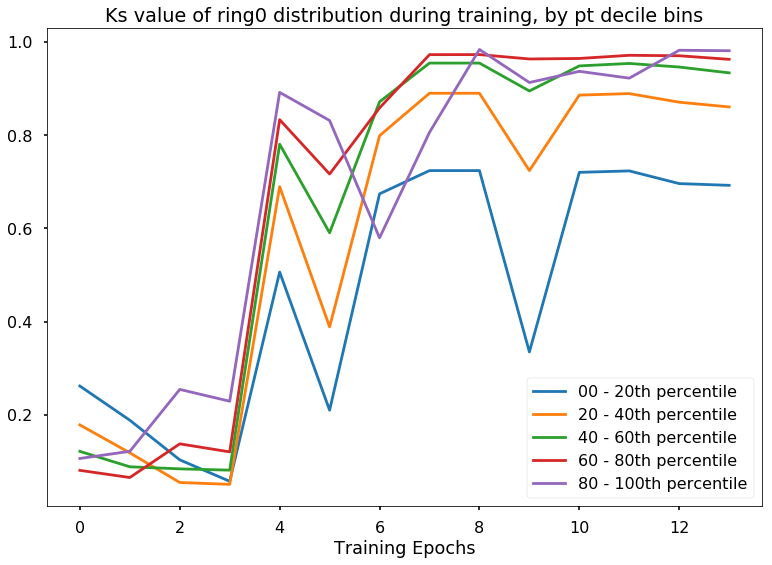

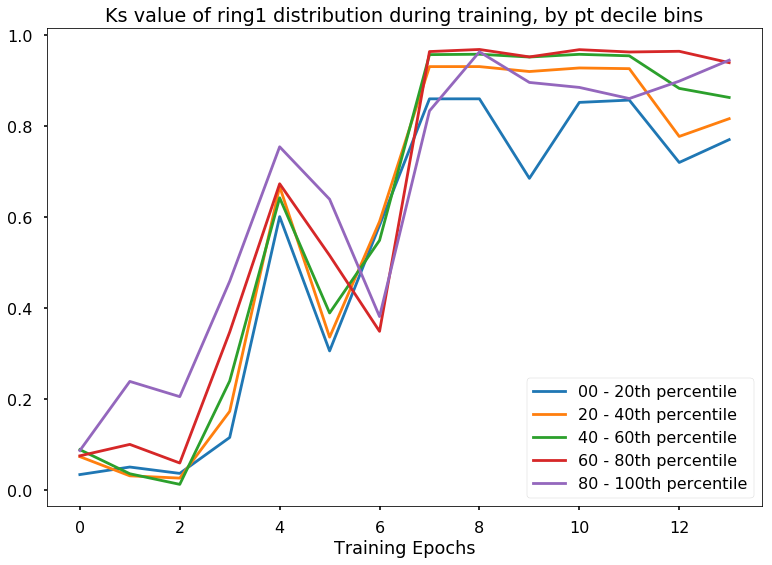

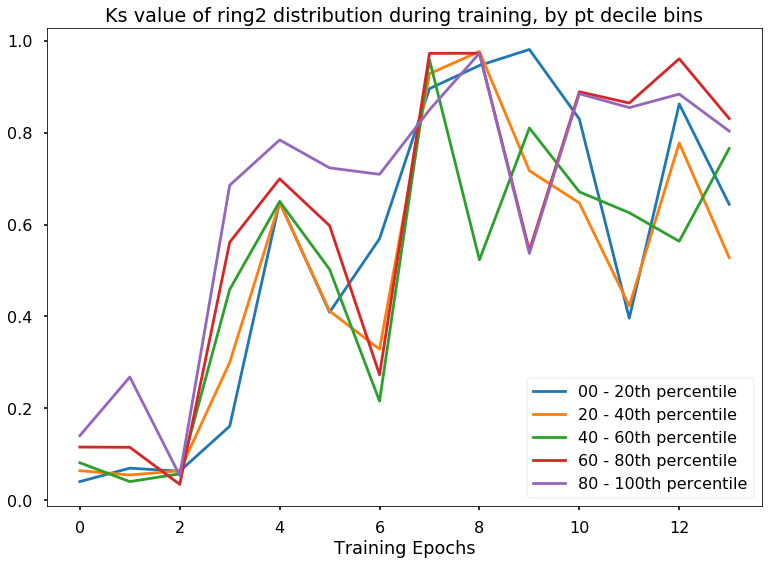

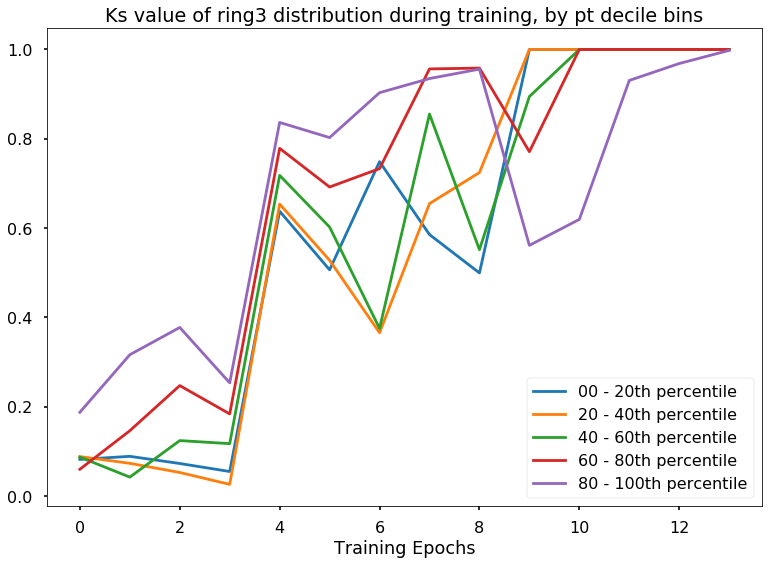

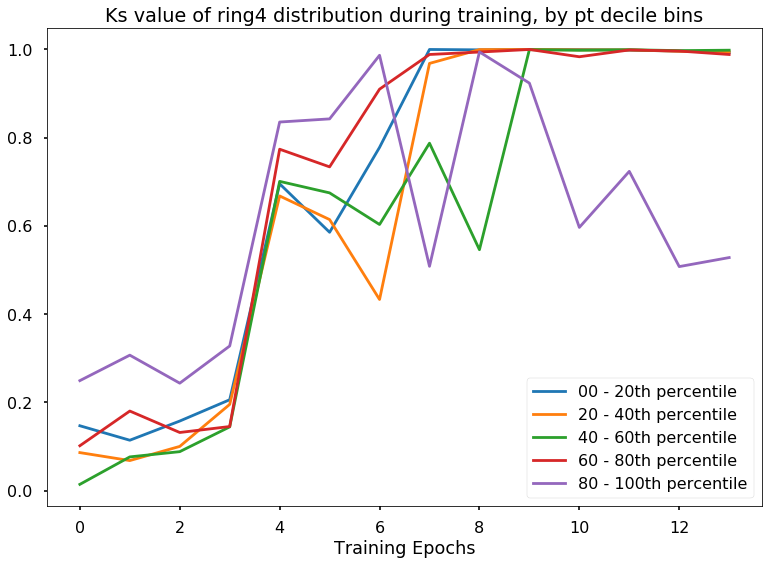

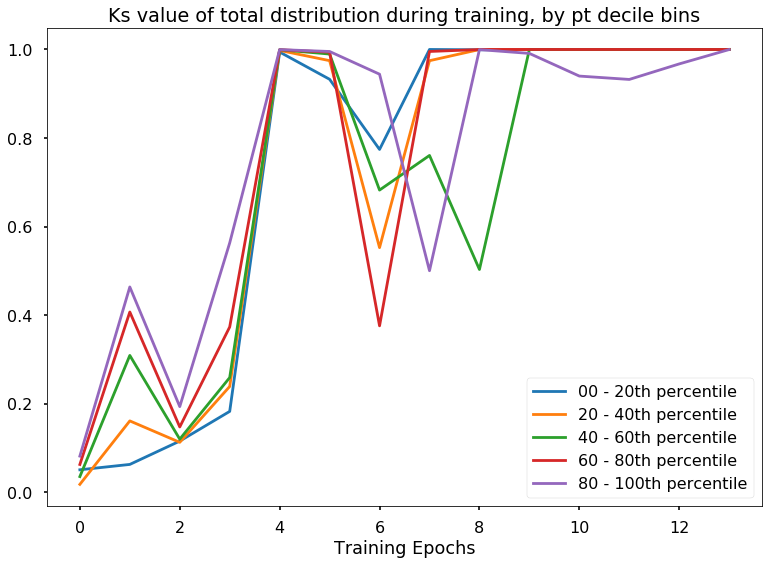

In [4]:
for v in [
        # 'ptD','maja','mina','tau1','tau2','tau3','tau21','tau32',
          'ring0', 'ring1', 'ring2', 'ring3', 'ring4', 'total']: 
    plot_ks(v,lx)

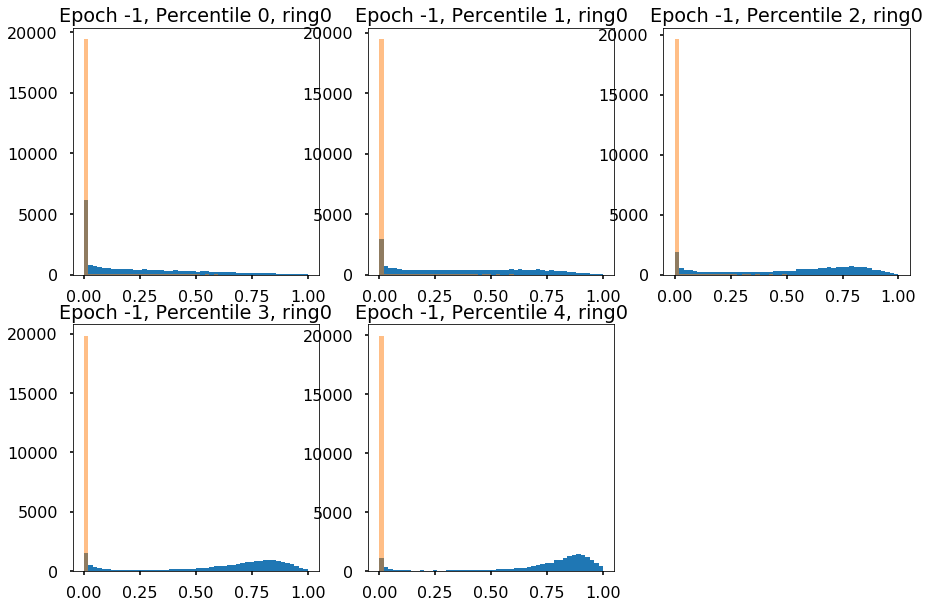

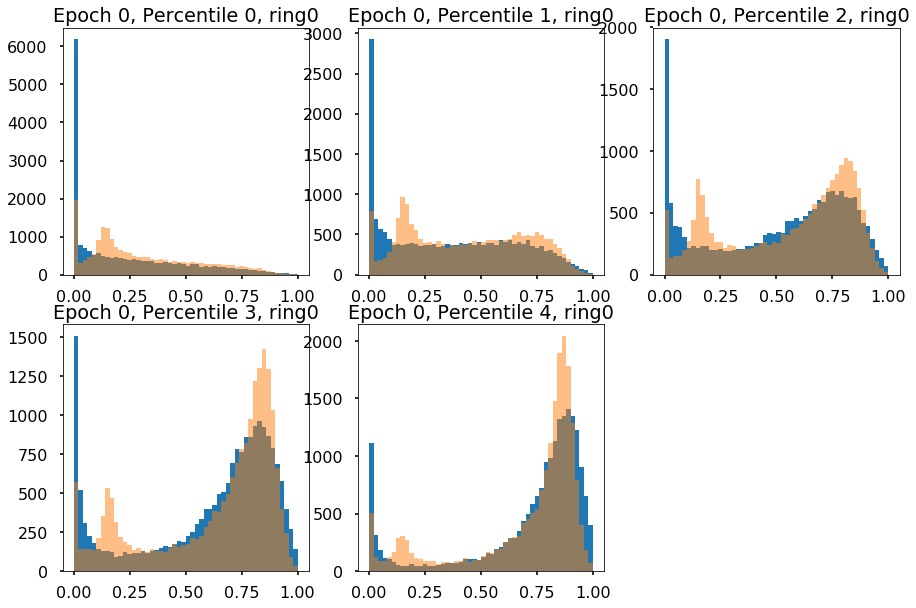

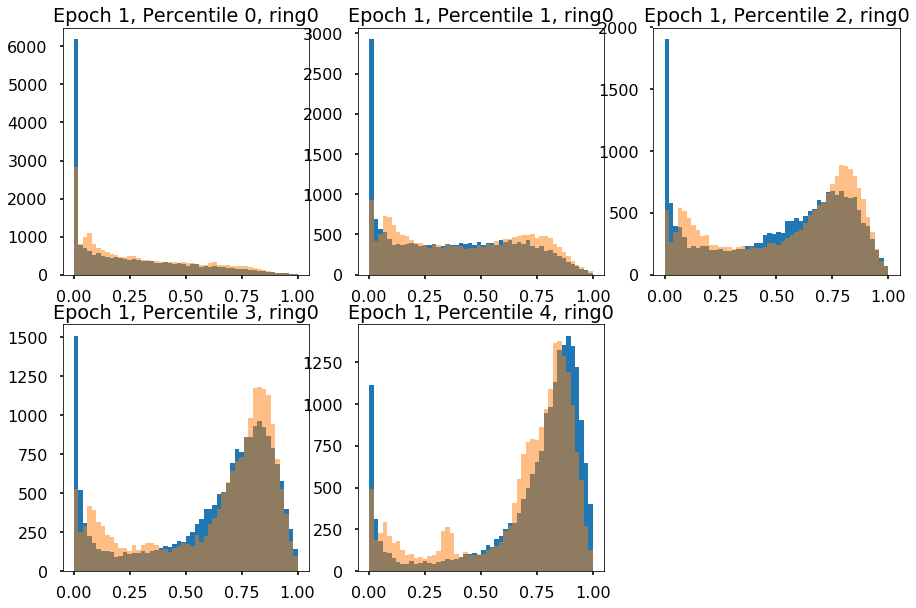

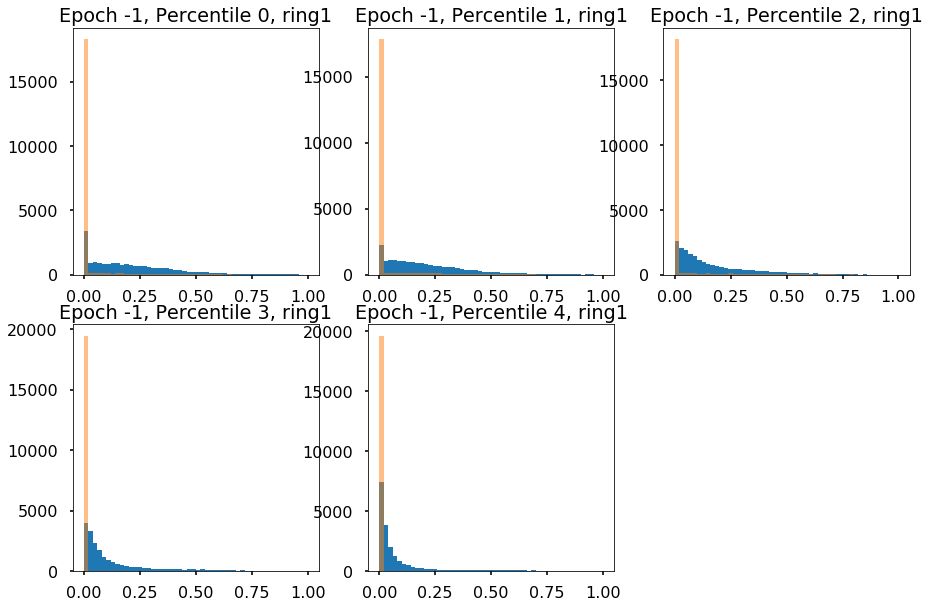

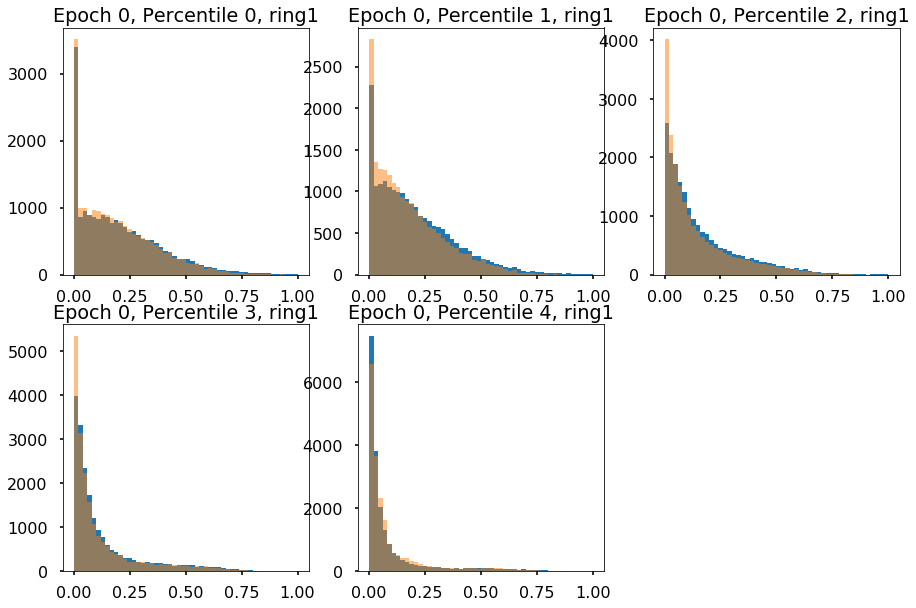

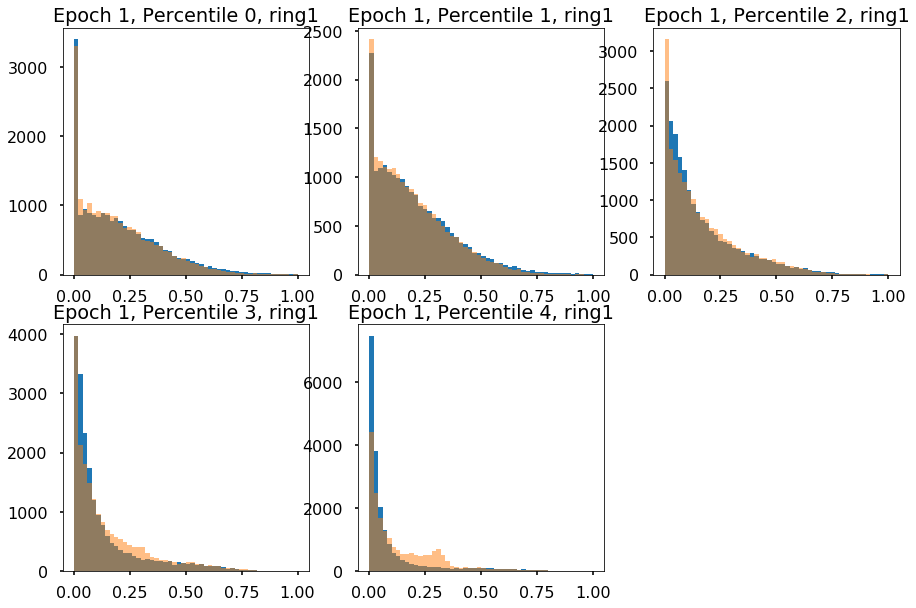

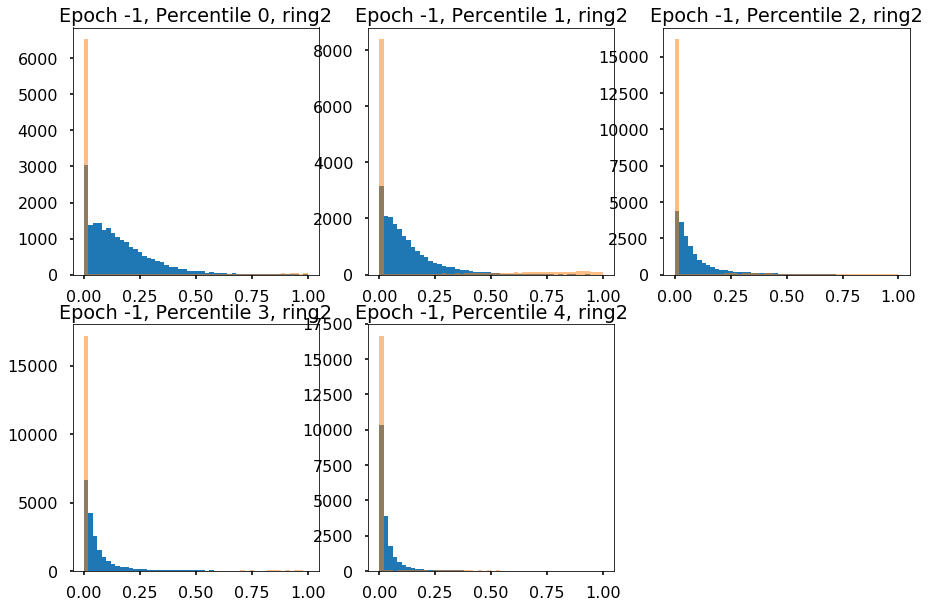

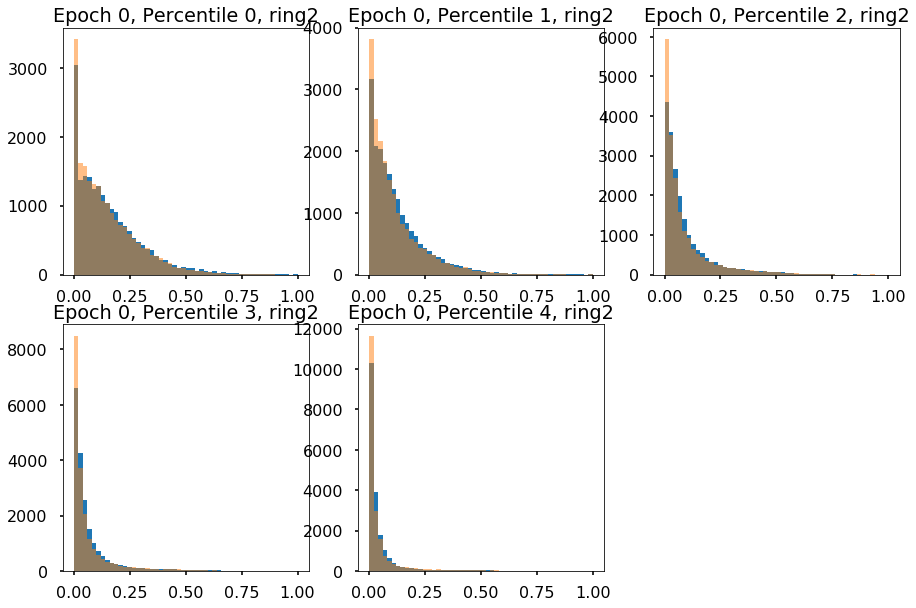

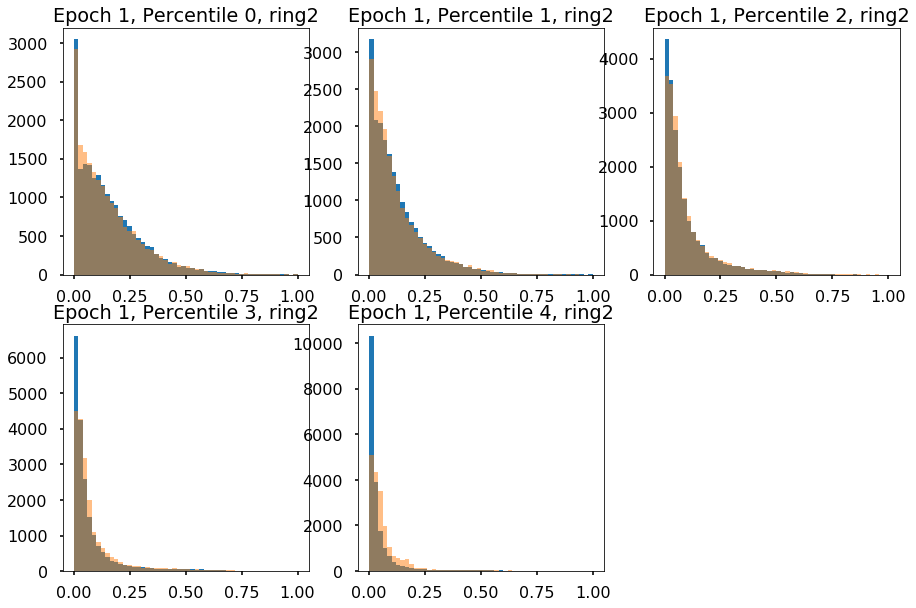

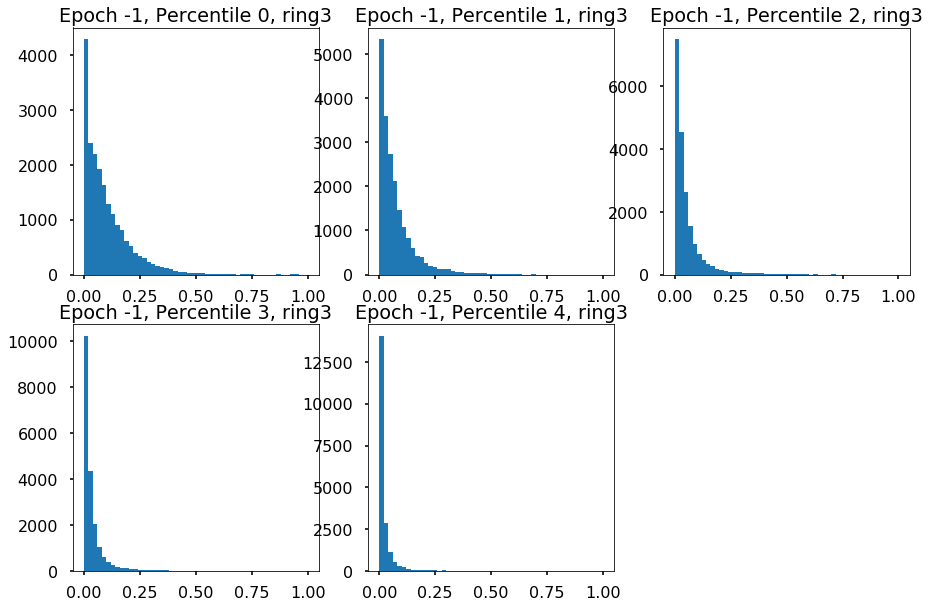

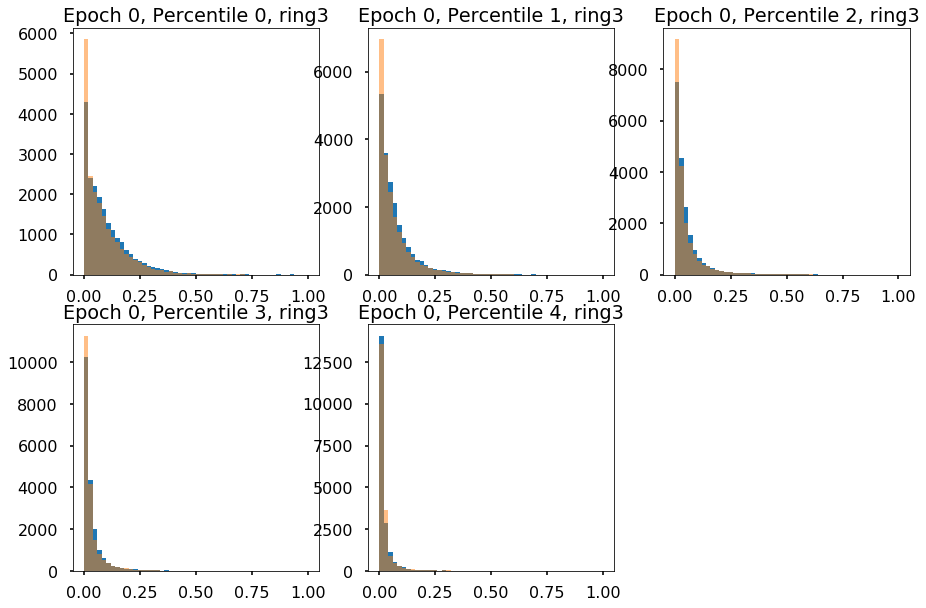

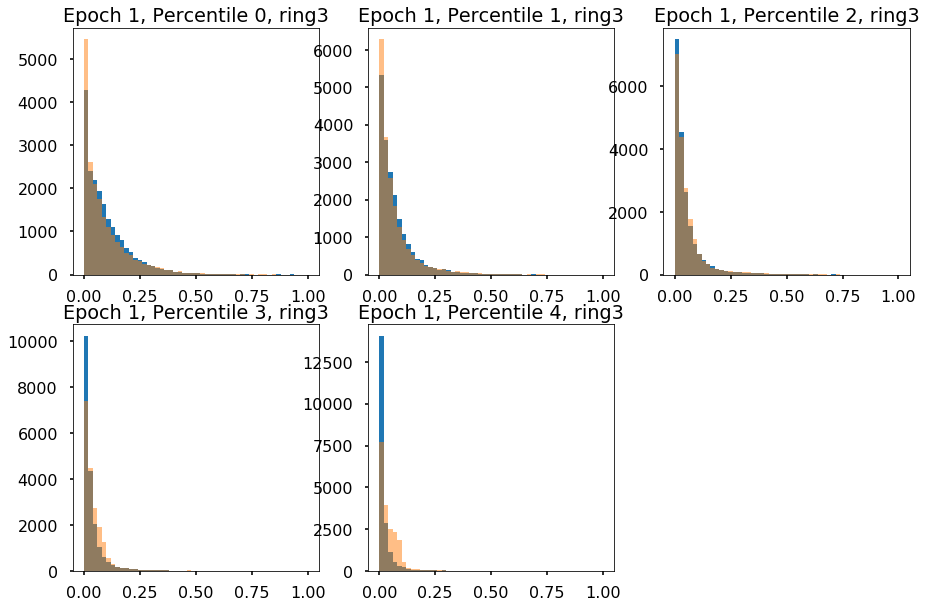

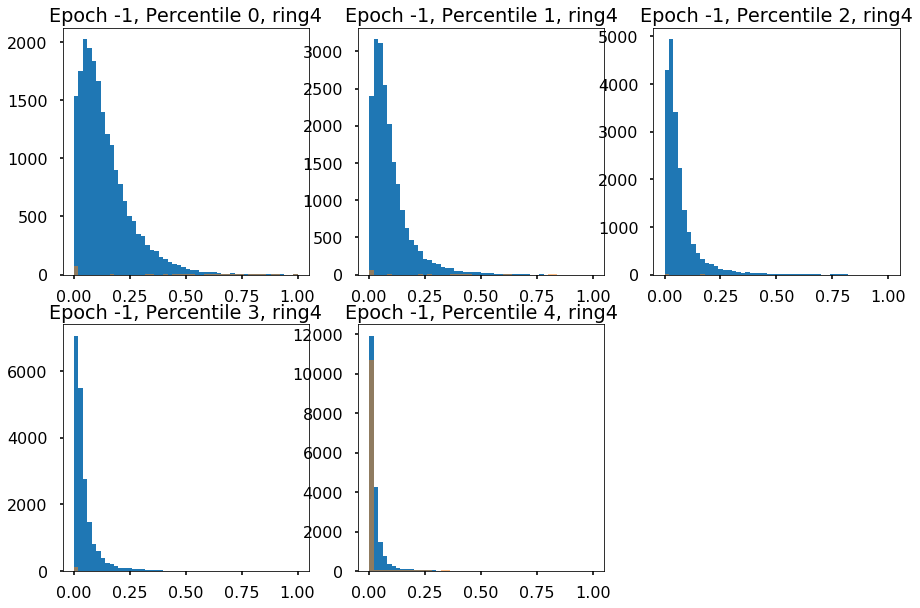

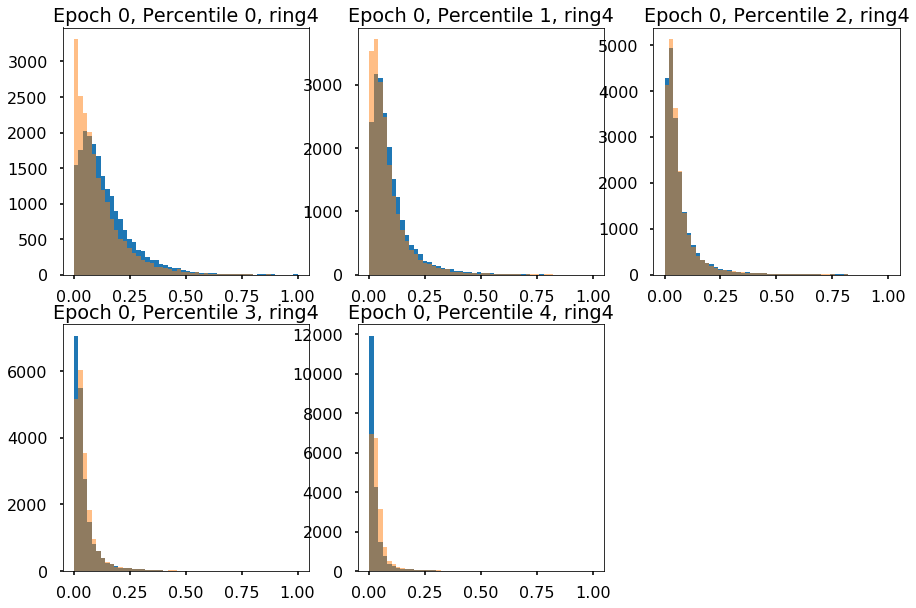

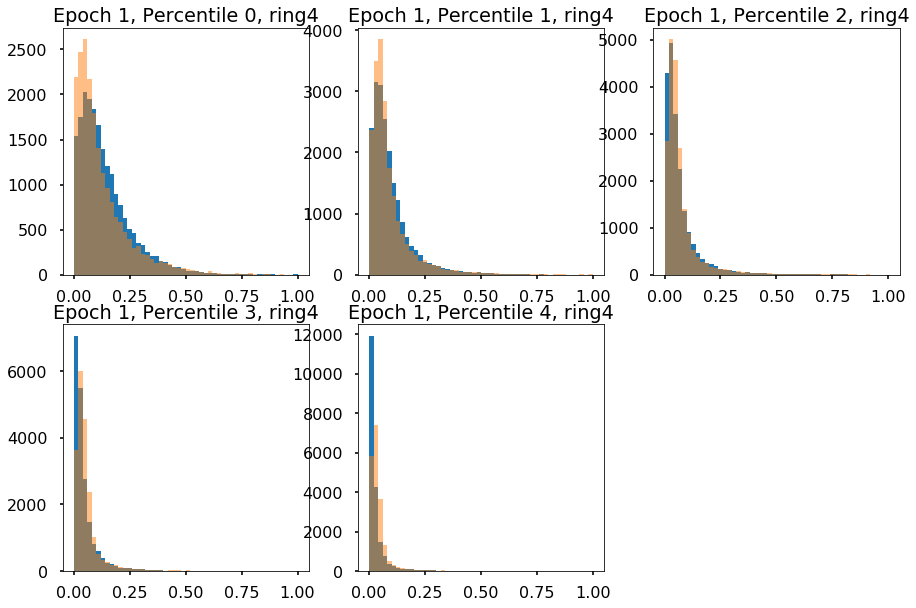

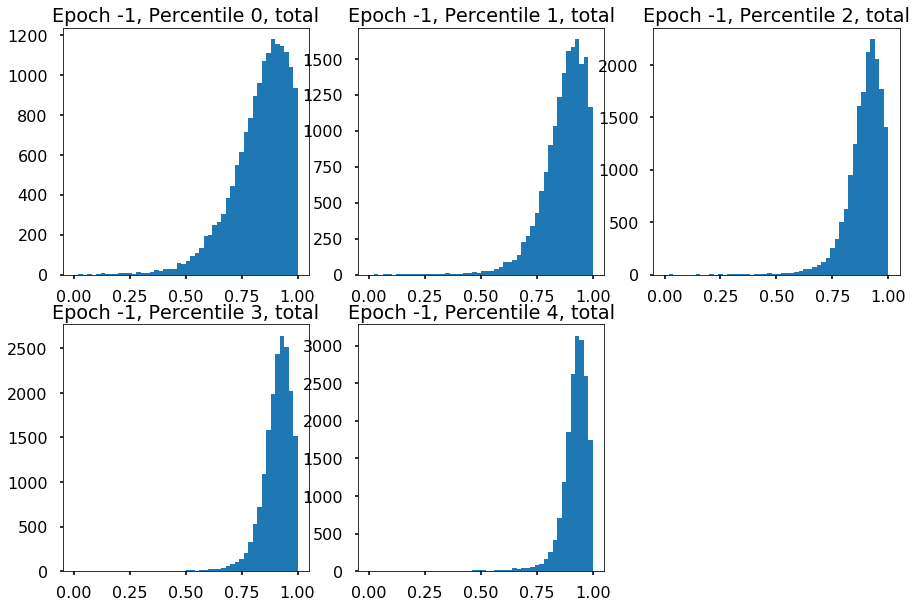

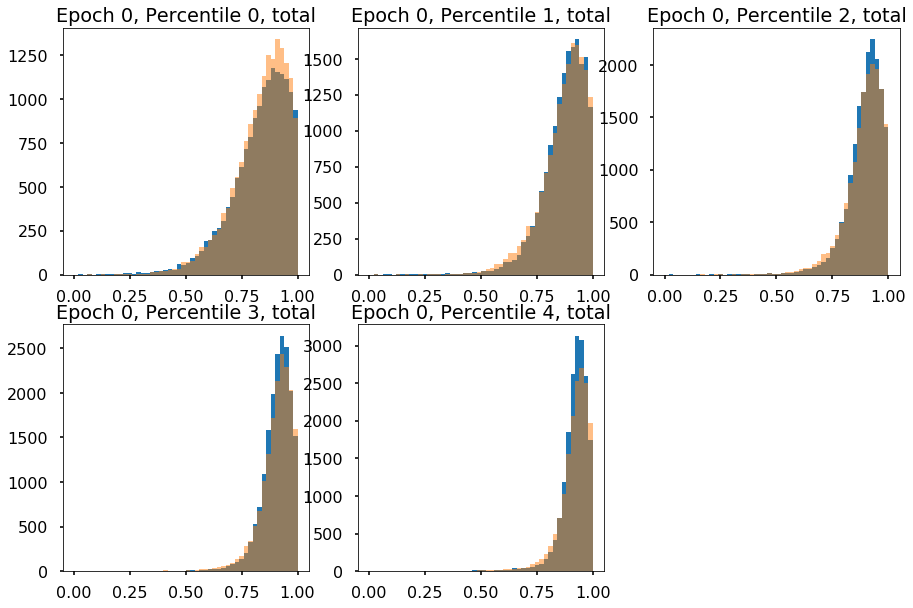

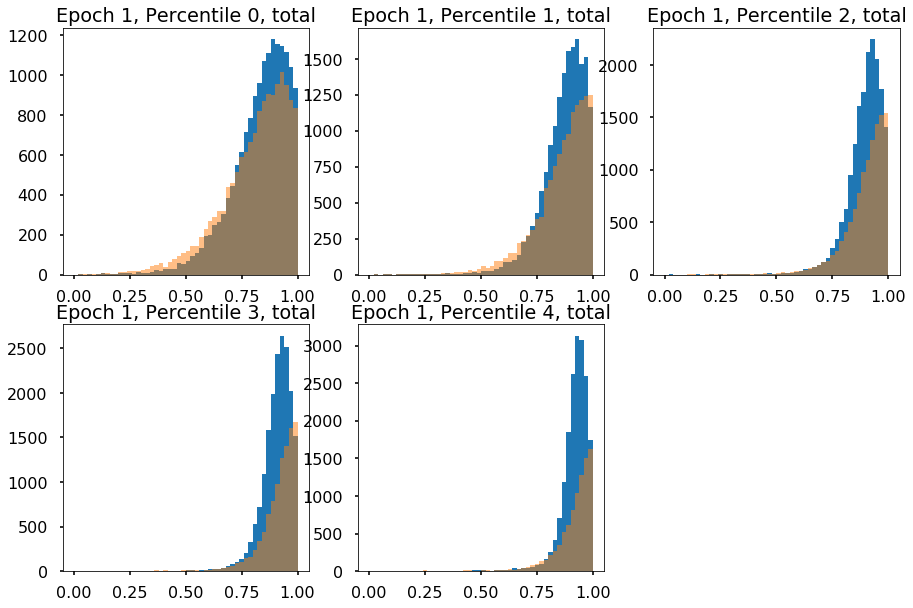

In [7]:
tested_rings = ['ring0','ring1', 'ring2', 'ring3', 'ring4','total']

for ring in tested_rings:
    plot_eps = [min_ep_rings-1,min_ep_rings,min_ep_rings+1]
    for ep,x in [(i,lx[i]) for i in plot_eps]:
        fg=plt.figure(figsize=(15,10))
        fg.set_facecolor('white')
        pt= x['pt']
        dx = np.percentile(pt,np.linspace(0,100,6))
        for pc,i in enumerate(np.arange(1,len(dx))): #percentile loop
            plt.subplot(2,3,i)
            plt.title("Epoch %d, Percentile %d, %s" % (ep,pc,ring))
            upper, lower = dx[i], dx[i-1]
            ptD_r_ring = x['reco_'+ring][(pt<upper)&(pt>=lower)]
            plt.hist(ptD_r_ring,bins=50,range=[0,1])
            plt.hist(x['pred_'+ring][(pt>=lower)&(pt<upper)],bins=50,range=[0,1],alpha=0.5)
        plt.show()